## Logistic Regression

Logistic regression differs from linear regression by using the sigmoid activation function:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
This "S"-shaped function maps values to the range $(0, 1)$, so instead of forcing the datapoint into a binary we can consider a range of values. This makes it ideal for predicting probabilities and handling overlapping data, as when there is overlap of two data sets the sigmoid function will assign values closer to 0.5 to represent the uncertanty between the two groups.

### Cross Entropy Loss Function

We want to maximize the likelyhood that points are properly classified, so for binary classification we use the __Binary Cross Entropy Loss__ function to measure the difference between predicted probabilities and true labels:
$$
L(\mathbf{w}, b) = -\frac{1}{N} \sum_{i=1}^{N} \Big[ y^{(i)}\log \hat{y}^{(i)} + (1-y^{(i)}) \log (1 - \hat{y}^{(i)}) \Big]
$$
Minimizing this loss function maximizes the probability of correct classifications using the sigmoid activation function.
Just like in the linear regression model we do this with the **Stochasic Gradient Descent** method.


In [11]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class

D = pd.concat([banknote_df.iloc[:50], banknote_df.iloc[762:812]]) # reduces the data set size to 50 of each

# so our lable is the class column,
y = D['class'].to_numpy()
X = D[['variance', 'entropy']].values

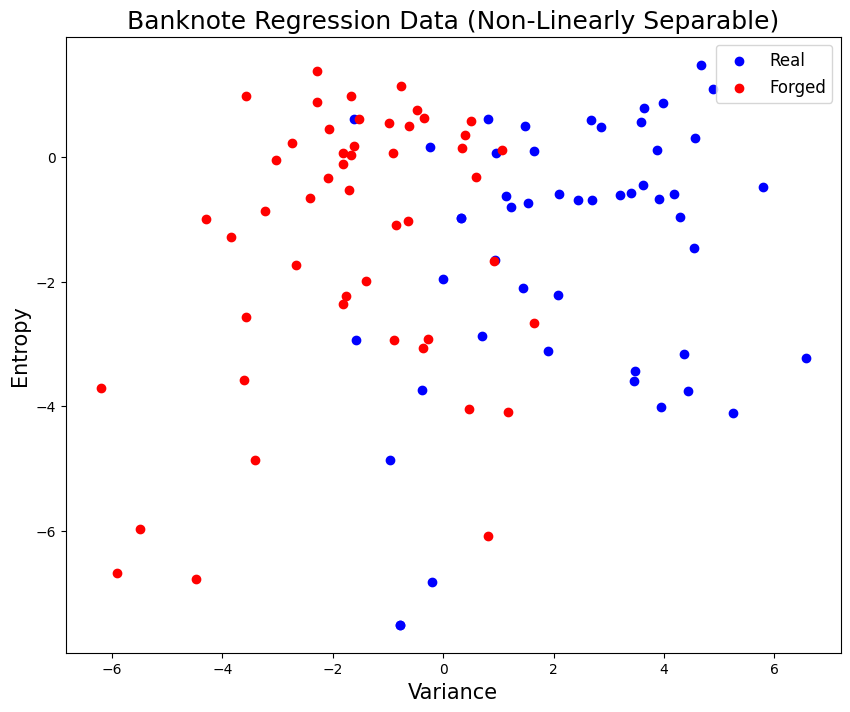

In [13]:
plt.figure(figsize=(10, 8))
plt.title("Banknote Regression Data (Non-Linearly Separable)", fontsize=18)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Real')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Forged')
plt.xlabel("Variance", fontsize=15)
plt.ylabel("Entropy", fontsize=15)
plt.legend(fontsize=12)
plt.show()

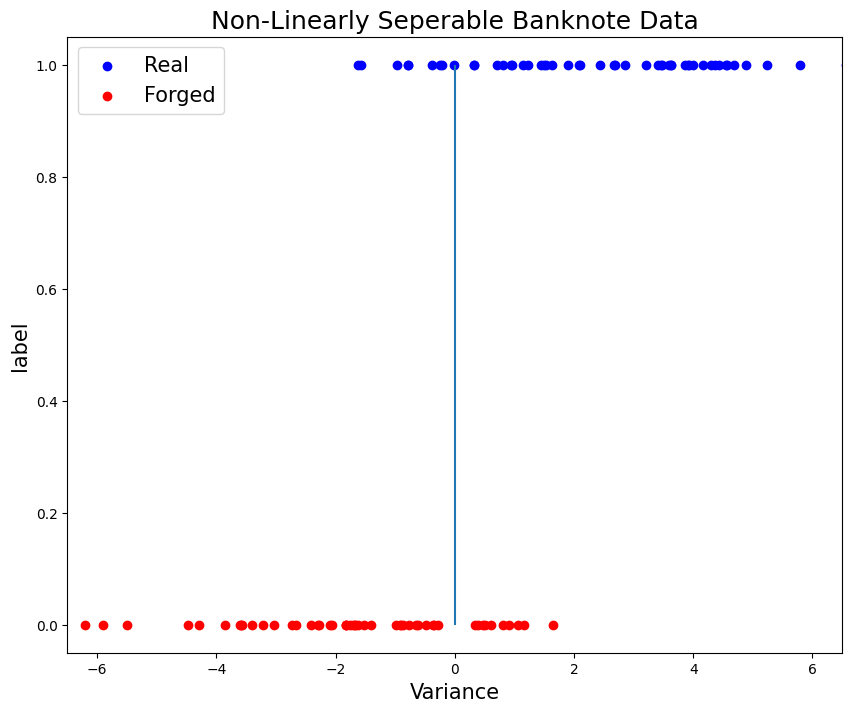

In [14]:
plt.figure(figsize = (10, 8))
plt.xlim((-6.5, 6.5))
plt.scatter(X[y == 0, 0], np.ones(50), c='blue', label='Real')
plt.scatter(X[y == 1, 0], np.zeros(50), c='red', label='Forged')
plt.vlines(0.0, 0.0, 1.0)
plt.xlabel("Variance", fontsize=15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Banknote Data", fontsize = 18)
plt.show()

In [15]:
node = ml.Logistic_Regression_Neuron()

X = D.variance.values
X = X.reshape(-1, 1)

# y = D['class'].to_numpy()
# X = D[['variance', 'entropy']].values

node.train(X, y, 0.001, 100) # the alpha learning rate and the number of periods

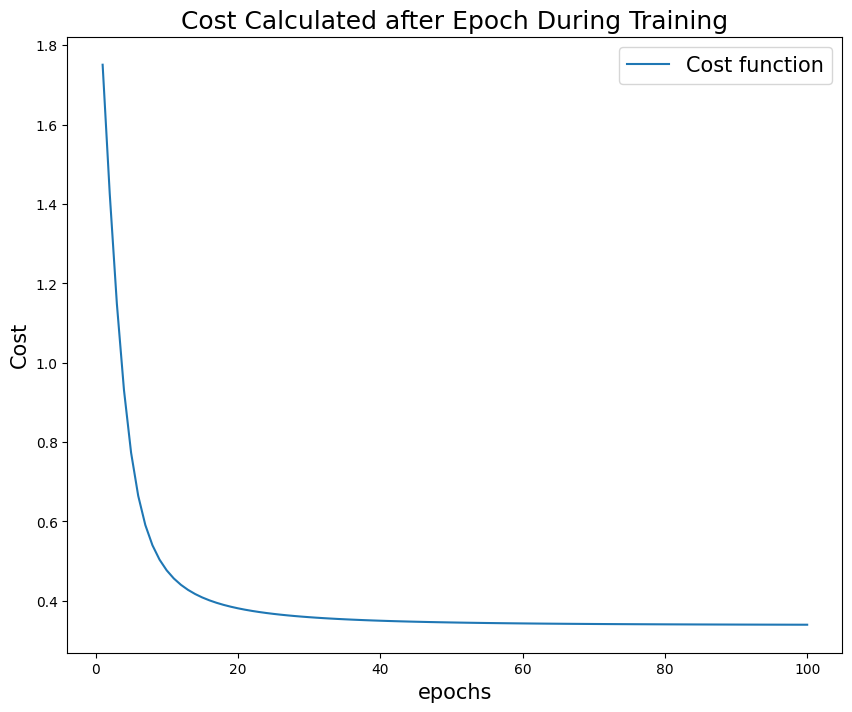

In [16]:
node.plot_cost_function()
plt.show()

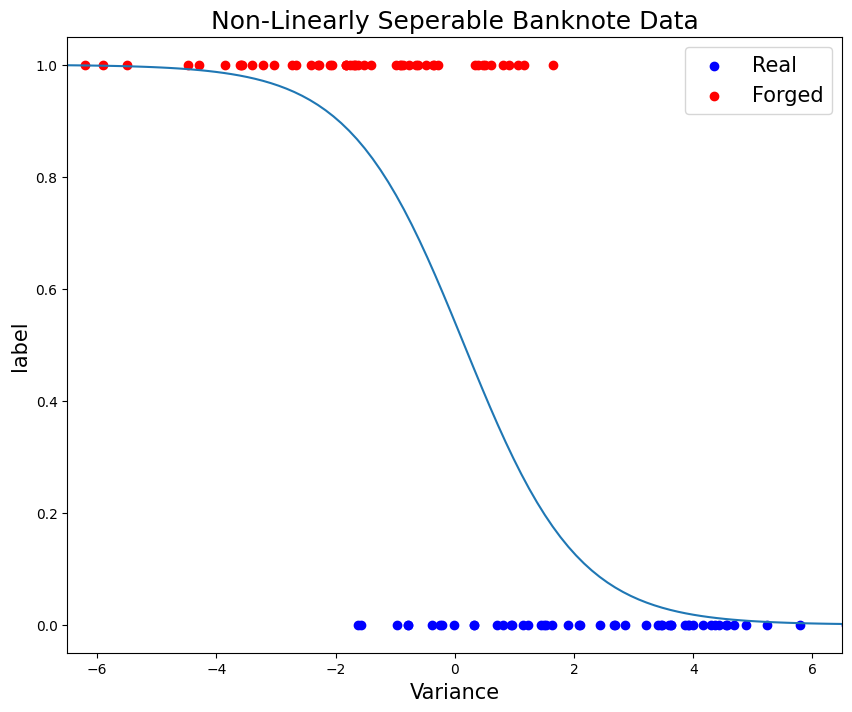

In [17]:
plt.figure(figsize = (10, 8))
plt.xlim((-6.5, 6.5))
plt.scatter(X[y == 0, 0], np.zeros(50), c='blue', label='Real')
plt.scatter(X[y == 1, 0], np.ones(50), c='red', label='Forged')
plt.xlabel("Variance", fontsize=15)
plt.ylabel("label", fontsize = 15)

domain = np.linspace(-6.5,6.5,100)

plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.legend(fontsize = 15, loc = "upper right")
plt.title("Non-Linearly Seperable Banknote Data", fontsize = 18)
plt.show()

## Logistic Curve Effect

Even though the above data is clearly overlapping, the logistic curve centers on the right spot to most effectivley split the groups. It lets us see how the probability of being in one set or the other changes as we cross between groups, that it is not just a binary flip. However, for visualization it is convenient to use the center of the curve as the boundary of two groups, even though that removes some of the model's information.

In [18]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.19


## Binary Classification With Multiple Inputs

We can now move into 2D, considering both Variance and Entropy of the Banknote images in order to divide the two groups in a way that maximizes the probability that they are correctly classified.It sucessfully does so, unlike the basic perceptron which would never converge for overlapping groups like this one.

In [19]:
# Instantiate a new single neuron.
node_two = ml.Logistic_Regression_Neuron()

X_two = D[['variance', 'entropy']].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, 0.001, 100) # the alpha learning rate and the number of periods

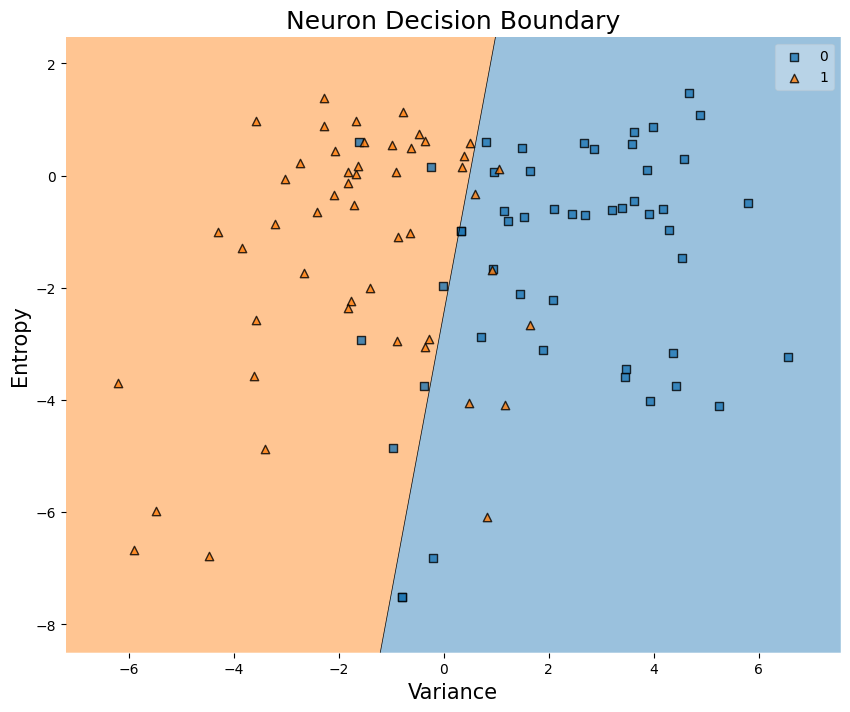

In [20]:
node_two.plot_decision_boundary(X_two, y,"Variance","Entropy")